# Linear Regression

In [ ]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


In [ ]:
# Preços de casas
x = np.array([113, 347, 199, 371, 549, 301, 419, 579])

In [ ]:
# Tamanho de Casas
y = np.array([1119, 1524, 2101, 2232, 2599, 3201, 3687, 4459])


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

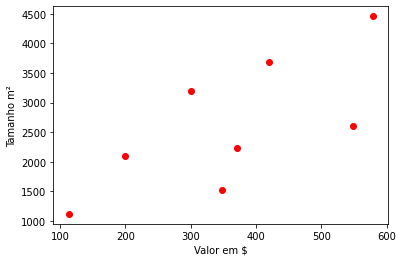

In [ ]:
# Verificando a relação das variaveis
plt.plot(x, y, 'ro', color = 'red')
plt.ylabel('Tamanho m²')
plt.xlabel('Valor em $')
plt.show()

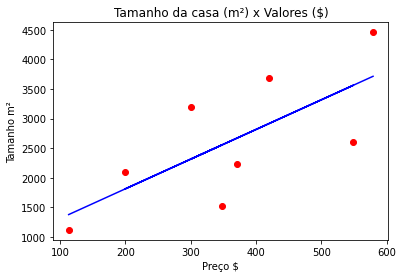

In [ ]:
# Gerando uma linha de Regressao
plt.scatter(x, y, color = 'red')
plt.plot(x, x * slope + intercept, 'b')
plt.ylabel('Tamanho m²')
plt.xlabel('Preço $')
plt.title('Tamanho da casa (m²) x Valores ($)')
plt.show()

# Resolvendo o problema de peso do cerebro.

O dataset contém dados sobre medidas da cabeça de seres humanos e o peso do cérebro.

Desenvolver um modelo de regressao linear simples para prever o peso de um determiando cerebro.

In [ ]:
data = pd.read_csv('pesos2.csv')
data.head()

,Sexo,Grupo,Head Size,Brain Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
# Definição das variaveis
X = data['Head Size'].values
Y = data['Brain Weight'].values

In [ ]:
# Calculando os coeficientes
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Numero total de valores
n = len(X)

# Usando a formula para calcular a e b
number = 0
denom = 0

for i in range(n):
  number += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2

b = number / denom
a = mean_y - (b * mean_x)

# Imprime os coeficientes
print(a, b)

325.57342104944223 0.26342933948939945


In [ ]:
# Fazendo as previsoes -> com um cerebro pesando 4450g
# y = a+bx

y = 325.57 + (0.26 * 4450)
print(f'O peso do cerebro é: {y} gr')

O peso do cerebro é: 1482.57 gr


# Estudo de Caso

# Definindo o problema de negócio:

Construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa me´dia de casas na região de Boston EUA, por proprietarios. A variavel a ser prevista e um valor numerico que represenata a mediana da taxa de ocupação das casas. Para cada casa temos diversas variaveis explanatorias, sendo assim, podemos resolver este problema empregando regressao linear ou regressao multipla.

## Definindo o Dataset

Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.


# Dicionário de Dados:
Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1 - CRIM: per capita crime rate by town

2 - ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3 - INDUS: proportion of non-retail business acres per town

4 - CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5 - NOX: nitric oxides concentration (parts per 10 million)

6 - RM: average number of rooms per dwelling

7 - AGE: proportion of owner-occupied units built prior to 1940

8 - DIS: weighted distances to five Boston employment centres

9 - RAD: index of accessibility to radial highways

10 -TAX: full-value property-tax rate per 10,000

11 -PTRATIO: pupil-teacher ratio by town

12 -B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13 -LSTAT: % lower status of the population

TARGET: Median value of owner-occupied homes in $1000's -> variavel a ser 
prevista.

In [ ]:
# Carregando o dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Análise Exploratória

In [ ]:
# Dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Calculando a media da variavel resposta
val_medio_esperado_na_resposta = df['target'].mean()
print(val_medio_esperado_na_resposta)

22.532806324110698


In [ ]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos
# ainda não foram calculados.

squared_errors = pd.Series(val_medio_esperado_na_resposta - df['target'])**2
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


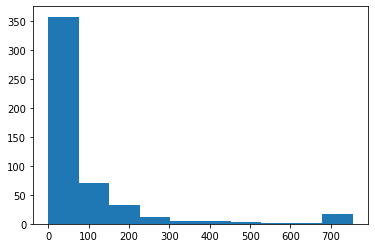

In [ ]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores proximo a media.
plt.hist(squared_errors)
plt.show()

Para cálculo da regeressão linear simples usamos como variavel preditora a variavel RM -> que representa o numero medio de quarto nas casas.

In [ ]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [ ]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável RM
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(df['RM']), np.std(df['RM'])))


Resultado da Função: 0.70192 Resultado do Numpy: 0.70192


In [ ]:
# Funções para calcular a variância da variável RM e a correlação com a variável target
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)


In [ ]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(df['RM'], df['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(df['RM'], df['target'])[0])

Nossa estimativa de Correlação: 0.69536
Correlação a partir da função pearsonr do SciPy: 0.69536


In [ ]:
# Definindo o range dos valores de x e y
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]

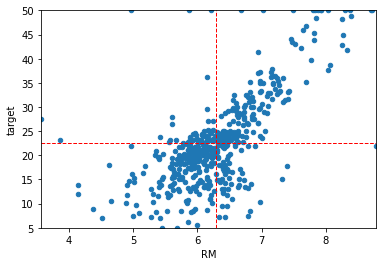

In [ ]:
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)


# Regressão Linear com o StastModels

In [ ]:
import statsmodels.api as sm 

In [ ]:
# Gerando x e y. Adicionamos uma constante ao valor de x, gerando uma matriz
y = df['target']
x = df['RM']


In [ ]:
# Esse comando adiciona os valores dos coeficientes a varivel x (o bias sera calculado internamente pela função).
x = sm.add_constant(x)

In [ ]:
x.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [ ]:
# Criando o modelo de Regressão
modelo = sm.OLS(y, x)

# Treinando o modelo
modelo_v1 = modelo.fit()

In [ ]:
# Sumario do modelo
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        03:03:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [ ]:
# Params
print(modelo_v1.params)

const   -34.670621
RM        9.102109
dtype: float64


In [ ]:
# Gerando os valores previstos
val_previsto = modelo_v1.predict(x)
print(val_previsto)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64


In [ ]:
# Fazendo previsões com o modelo treinado
RM = 5
Xp = np.array([1, RM])
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v1.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


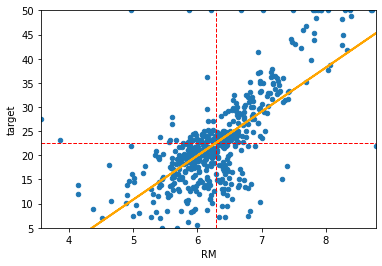

In [ ]:
# Plot dos valores de x e y com a média
scatter_plot = df.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df['target'].mean(),df['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(df['RM'], val_previsto, '-', color = 'orange', linewidth = 2)

In [ ]:
# Gerando os residuos
residuos = df['target'] - val_previsto
residuos_normalizados = standardize(residuos)

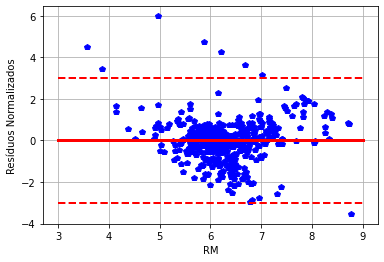

In [ ]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(df['RM'], residuos_normalizados,'bp')
plt.xlabel('RM')
plt.ylabel('Resíduos Normalizados')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

# Regressão Linear com Scikit-Learn

In [ ]:
from sklearn import linear_model

In [ ]:
# Criando o objeto
modelo_v2 = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [ ]:
# define os valores de x e y
num_oberv = len(df)
# x deve sempre ser uma matriz nunca um vetor
x = df['RM'].values.reshape(num_oberv, 1)
# y pode ser um vetor
y = df['target'].values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
np.ndim(x)

2

In [ ]:
#print(x)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
np.ndim(y)

1

In [ ]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
# Treinando o modelo v2
modelo_v2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print dos coeficientes
print('Coeficientes: ', modelo_v2.coef_)
print('==============================================')
print('Intercept: ', modelo_v2.intercept_)


Coeficientes:  [9.10210898]
Intercept:  -34.67062077643857


In [ ]:
# Fazendo previsões com o modelo treinado
RM = 5
Xp = np.array([RM]).reshape(-1, 1)
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


# Regressão Linear Múltipla

Usando a Regressao Linear Múltipla para solucionar o problema acima.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Carregando o dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
# Dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [ ]:
# Gerando numero de obesrevaçoes
observations = len(df)
variables = df.columns[:-1]

In [ ]:
# Coletando x e y
X = df.iloc[:, :-1]
Y = df['target'].values

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Usando Múltiplos atribus com StatsModels

In [ ]:
Xc = sm.add_constant(X)
modelo = sm.OLS(Y, Xc)
modelo_v1m = modelo.fit()

In [ ]:
# Sumario
modelo_v1m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        01:49:43   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Matriz de correlação

In [ ]:
# Gerando a matriz de correlação
X = df.iloc[:, :-1]
matriz_corr = X.corr()
print(matriz_corr)

             CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
CRIM     1.000000 -0.200469  0.406583  ...  0.289946 -0.385064  0.455621
ZN      -0.200469  1.000000 -0.533828  ... -0.391679  0.175520 -0.412995
INDUS    0.406583 -0.533828  1.000000  ...  0.383248 -0.356977  0.603800
CHAS    -0.055892 -0.042697  0.062938  ... -0.121515  0.048788 -0.053929
NOX      0.420972 -0.516604  0.763651  ...  0.188933 -0.380051  0.590879
RM      -0.219247  0.311991 -0.391676  ... -0.355501  0.128069 -0.613808
AGE      0.352734 -0.569537  0.644779  ...  0.261515 -0.273534  0.602339
DIS     -0.379670  0.664408 -0.708027  ... -0.232471  0.291512 -0.496996
RAD      0.625505 -0.311948  0.595129  ...  0.464741 -0.444413  0.488676
TAX      0.582764 -0.314563  0.720760  ...  0.460853 -0.441808  0.543993
PTRATIO  0.289946 -0.391679  0.383248  ...  1.000000 -0.177383  0.374044
B       -0.385064  0.175520 -0.356977  ... -0.177383  1.000000 -0.366087
LSTAT    0.455621 -0.412995  0.603800  ...  0.37404

In [ ]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

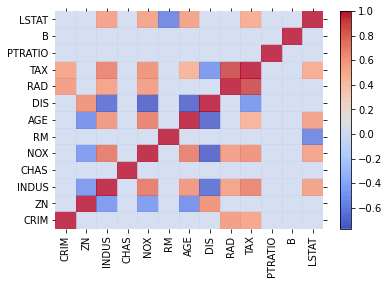

In [ ]:
# Visualizando o plot
visualize_correlation_matrix(X, hurdle= 0.5)

# Autovalores (Eigenvalues) e Autovetores (Eigenvectores)

In [ ]:
# Gerando a correlação
corr = np.corrcoef(X, rowvar= 0)
eigenvalues, eigenvectores = np.linalg.eig(corr)

In [ ]:
print('Eigenvalues: ', eigenvalues)
print('==================================')
print('Eigenvectores: ', eigenvectores[:,8])

Eigenvalues:  [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]
Eigenvectores:  [-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


Exibimos os nomes das variavesi que mais contribuem para construir o autovetor. Associamos o vetor de variaveis com eigenvector

In [ ]:
print(variables[2], variables[8], variables[9])

INDUS RAD TAX


Tendo encontrado os culpados da multicolinearidade, o que devemos fazer com essas variaveis? A remoção de algumas delas é geralmente a melhor solução.

Podemos aplicar Feature Scaling através de Padronização ou Normalização. Normalização aplica escala aos dados com intervalos entre 0 e 1. A Padronização divide a média pelo desvio padrão para obter uma unidade de variância. Vamos usar a Padronização (StandardScaler) pois nesse caso esta técnica ajusta os coeficientes e torna a superfície de erros mais "tratável".

In [ ]:
# Aplicando Padronização
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_

In [ ]:
# Gerando X e Y
Xst = np.column_stack((Xst, np.ones(observations)))
y = df['target'].values

In [ ]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path 

In [ ]:
# Imprimindo o resultado                          
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("Coeficientes finais padronizados: " + ', '.join(map(lambda x: "%0.4f" % x, w)))  

Coeficientes finais padronizados: -0.9281, 1.0816, 0.1409, 0.6817, -2.0567, 2.6742, 0.0195, -3.1040, 2.6622, -2.0768, -2.0606, 0.8493, -3.7436, 22.5328


In [ ]:
# Desfazendo a Padronização
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias  = w[-1]-np.sum((original_means / original_stds) * w[:-1])

In [ ]:
# Imprimindo o resultado
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias:  36.4595
    CRIM:  -0.1080
      ZN:   0.0464
   INDUS:   0.0206
    CHAS:   2.6867
     NOX: -17.7666
      RM:   3.8099
     AGE:   0.0007
     DIS:  -1.4756
     RAD:   0.3060
     TAX:  -0.0123
 PTRATIO:  -0.9527
       B:   0.0093
   LSTAT:  -0.5248


# Importancia dos Atributos

In [ ]:
# Criando o modelo
modelo = linear_model.LinearRegression(normalize=False, fit_intercept= True)

In [ ]:
# Treinando o modelo com os dados não padronizados (escalas diferentes)
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, modelo.coef_), df.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

17.767 NOX
 3.810 RM
 2.687 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.108 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [ ]:
# Padronizando os dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

In [ ]:
# Treinando o modelo com os dados padronizados
Stand_coef_linear_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), df.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))


 3.744 LSTAT
 3.104 DIS
 2.674 RM
 2.662 RAD
 2.077 TAX
 2.061 PTRATIO
 2.057 NOX
 1.082 ZN
 0.928 CRIM
 0.849 B
 0.682 CHAS
 0.141 INDUS
 0.019 AGE


# Usando o R Squared

In [ ]:
modelo_r_s = linear_model.LinearRegression(normalize=False, fit_intercept= True)

In [ ]:
# Calculando o R²
def r2_est(X,y):
    return r2_score(y, modelo_r_s.fit(X,y).predict(X))

In [ ]:
print('Coeficiente R²: %0.3f' % r2_est(X, y))

Coeficiente R²: 0.741


In [ ]:
# Gera o impacto de cada atributo no R2
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), df.columns[j]))
   
for imp, varname in sorted(r2_impact, reverse = True):
    print ('%6.3f %s' %  (imp, varname))

 0.056 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 CRIM
 0.006 TAX
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


# Fazendo Previsões com o modelo de Regressao Linear Múltipla

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Formato do Dataset
print("Boston Housing dataset tem {} observações com {} variaveis cada uma. ".format(*df.shape))

Boston Housing dataset tem 506 observações com 14 variaveis cada uma. 


In [ ]:
# Coletando x e y
# Usaremos como variáveis explanatórias somente as 4 variáveis mais relevantes
X = df[['LSTAT', 'RM', 'DIS', 'PTRATIO']]
y = df['target'].values

In [ ]:
X.head()

,LSTAT,RM,DIS,PTRATIO
0,4.98,6.575,4.0900,15.3
1,9.14,6.421,4.9671,17.8
2,4.03,7.185,4.9671,17.8
3,2.94,6.998,6.0622,18.7
4,5.33,7.147,6.0622,18.7


In [ ]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
modelo_r_s1 = LinearRegression(normalize= False, fit_intercept= True)

In [ ]:
# Treinando o modelo
modelo_v2m = modelo_r_s1.fit(X_train, y_train)

In [ ]:
# Calcula a métrica R² do nosso modelo
r2_score(y_test, modelo_v2m.fit(X_train, y_train).predict(X_test))


0.6347923449246606

In [ ]:
# Produz a matriz com os novos dados de entrada para a previsão
LSTAT = 5
RM = 8
DIS = 6
PTRATIO = 19

# Lista com os valores das variáveis
dados_nova_casa = [LSTAT, RM, DIS, PTRATIO]

# Reshape
Xp = np.array(dados_nova_casa).reshape(1, -1)

# Previsão
print("Taxa Média de Ocupação Para a Casa é de:", modelo_v2m.predict(Xp))

Taxa Média de Ocupação Para a Casa é de: [33.65282404]
